# Plot Utility
This notebook provide basic function to plot the results obtained using the study_auto_encoder notebook.

### Plot Setting
The following cell defines the configuration of the plot where lists are used to define the color, label, etc. of all curves.

In [1]:
import numpy as np
import os
import itertools
import csv

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.text as mtext
import matplotlib.colorbar as clb
import matplotlib.cm as cm


import scipy.stats as stats

(n,k) = (31,16)

plot_config = {
    'path':f'study-ae-{n}-{k}-rep',                                                                                 # Path of the results
    'title':f'Training Repeatability (31,16) Code',                                                                 # Plot title
    'labels': [],                                                                                                   # Labels of each curves
    'categories': [],                                                                                               # Legends categories
    'lines':[],                                                                                                     # Type of lines
    'colors':[],                                                                                                    # Colors
    'markers':[],                                                                                                   # Types of markers
    'plot': [],                                                                                                     # Which curves to plot. If set to [] then all curves are plotted
    'x':'Eb_No',                                                                                                    # Plot vs 'Eb_No' or 'SNR',
    'y':'BER',                                                                                                      # Plot 'BER' or 'BLER',
    'min_x': 0,                                                                                                     # Min x
    'max_x': 6,                                                                                                     # Max x
    'min_y': None,                                                                                                  # Min y
    'max_y': None,                                                                                                  # Max y
    'save':True,                                                                                                    # Save plot
    'plot_uncoded_BPSK':False                                                                                        # Plot uncoded BPSK reference (need to adjust above arguments accordingly)
}



### Plot Data

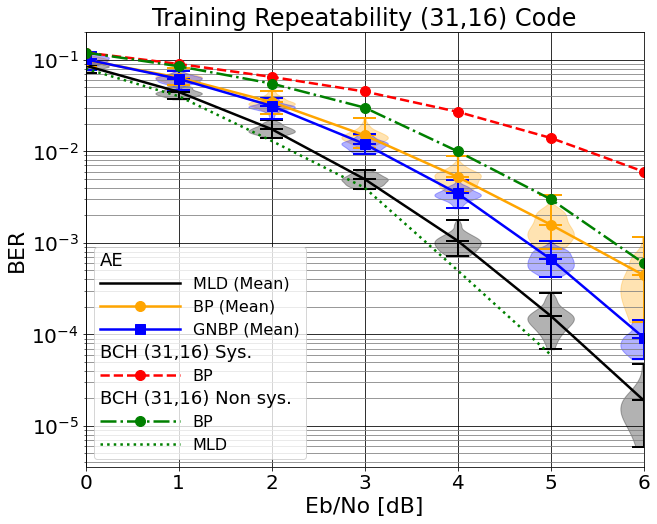

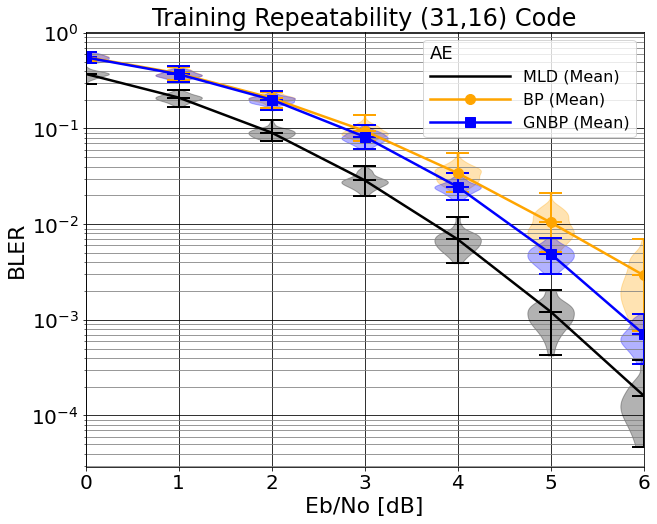

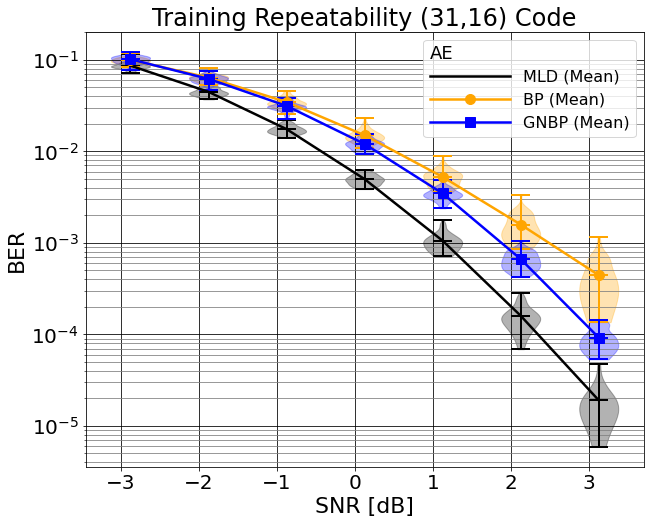

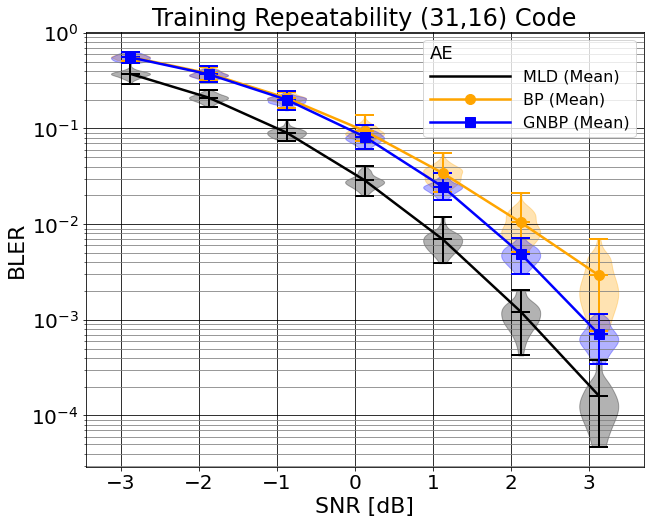

In [2]:
class LegendTitle(object):
    def __init__(self, text_props=None):
        self.text_props = text_props or {}
        super(LegendTitle, self).__init__()

    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        title = mtext.Text(x0, y0, orig_handle, usetex=False, **self.text_props)
        handlebox.add_artist(title)
        return title
 
def plot_data_stat(plot_config):   
    data = []
    if plot_config['y'] == 'BLER':
        with open(plot_config['path'] + "/results/summary-bler.csv", newline="") as csvfile:
            csv_reader = csv.reader(csvfile, delimiter=",")
            for row in csv_reader:
                data.append(row)
        y_label = 'BLER'
    else:
        with open(plot_config['path'] + "/results/summary-ber.csv", newline="") as csvfile:
            csv_reader = csv.reader(csvfile, delimiter=",")
            for row in csv_reader:
                data.append(row)
        y_label = 'BER'
                
    data = np.array(data)        

    if plot_config['x'] == 'SNR':
        SNR = [float(y) for y in data[1:,1]]
        x_data = SNR
        x_label = 'SNR [dB]'
    else:
        Eb_No = [float(y) for y in data[1:,0]]
        x_data = Eb_No
        x_label = 'Eb/No [dB]'
    
    GNBP_data = np.array(data[1::1,2::3],dtype=np.float32)
    ML_data = np.array(data[1::1,3::3],dtype=np.float32)
    BP_data = np.array(data[1::1,4::3],dtype=np.float32)

    q_min = 0.25
    q_max = 0.75
    GNBP_data_min = np.min(GNBP_data,axis = -1) 
    GNBP_data_25 = np.quantile(GNBP_data,q_min,axis=-1)
    GNBP_data_mean = np.mean(GNBP_data,axis = -1) 
    GNBP_data_75 = np.quantile(GNBP_data,q_max,axis=-1) 
    GNBP_data_max = np.max(GNBP_data,axis = -1)   

    ML_data_min = np.min(ML_data,axis = -1) 
    ML_data_25 = np.quantile(ML_data,q_min,axis=-1)
    ML_data_mean = np.mean(ML_data,axis = -1)
    ML_data_75 = np.quantile(ML_data,q_max,axis=-1)   
    ML_data_max = np.max(ML_data,axis = -1) 
    
    BP_data_min = np.min(BP_data,axis = -1) 
    BP_data_25 = np.quantile(BP_data,q_min,axis=-1)
    BP_data_mean = np.mean(BP_data,axis = -1)  
    BP_data_75 = np.quantile(BP_data,q_max,axis=-1) 
    BP_data_max = np.max(BP_data,axis = -1) 
    
    categories = []
    labels = []
    plt.figure(figsize=(10,8))

    [line] = plt.plot(x_data,ML_data_mean,label="ML (Mean)",color='black',linewidth=2.5)
    violin = plt.violinplot([sorted(np.array(data)) for data in ML_data],showmeans=True, positions=x_data)
    for pc in violin['bodies']:
        pc.set_facecolor('black')
        pc.set_edgecolor('black')
    for partname in ('cbars','cmins','cmaxes','cmeans'):
        vp = violin[partname]
        vp.set_edgecolor('black')
        vp.set_linewidth(2)
    
    categories.append('AE')
    categories.append(line)
    labels.append("")
    labels.append("MLD (Mean)")
    
    [line] = plt.plot(x_data,BP_data_mean,label="BP (Mean)",color="orange",marker='o',markersize=10,linewidth=2.5)
    violin = plt.violinplot([sorted(np.array(data)) for data in BP_data],showmeans=True, positions=x_data)
    for pc in violin['bodies']:
        pc.set_facecolor('orange')
        pc.set_edgecolor('orange')
    for partname in ('cbars','cmins','cmaxes','cmeans'):
        vp = violin[partname]
        vp.set_edgecolor('orange')
        vp.set_linewidth(2)
    
    categories.append(line)
    labels.append("BP (Mean)")
       
    [line] = plt.plot(x_data,GNBP_data_mean,label="GNBP (Mean)",color="blue", marker='s',markersize=10,linewidth=2.5)
    violin = plt.violinplot([sorted(np.array(data)) for data in GNBP_data],showmeans=True, positions=x_data)
    for pc in violin['bodies']:
        pc.set_facecolor('blue')
        pc.set_edgecolor('blue')

    for partname in ('cbars','cmins','cmaxes','cmeans'):
        vp = violin[partname]
        vp.set_edgecolor('blue')
        vp.set_linewidth(2)
    
    categories.append(line)
    labels.append("GNBP (Mean)")
        
    #ADD BCH (31,16) results
    if plot_config['y'] == 'BER' and plot_config['x'] == 'Eb_No':
        BCH_Eb_No = [0,1,2,3,4,5,6]
        BCH_sys_BP = [0.12,0.09,0.065,0.045,0.027,0.014,0.006]
        BCH_nsys_BP = [0.12,0.085,0.055,0.03,0.01,0.003,0.0006]
        BCH_ML = [0.08,0.04,0.013,0.004,0.0005,0.00006,None]
        
        [line] = plt.plot(BCH_Eb_No,BCH_sys_BP,"red",marker='o',linestyle='--',label="BP",markersize=10,linewidth=2.5)
        categories.append('BCH (31,16) Sys.')
        categories.append(line)
        labels.append("")
        labels.append("BP")
        
        [line] = plt.plot(BCH_Eb_No,BCH_nsys_BP,"green",marker='o',linestyle='-.',label="BP",markersize=10,linewidth=2.5)
        categories.append('BCH (31,16) Non sys.')
        categories.append(line)
        labels.append("")
        labels.append("BP")
        
        [line] = plt.plot(BCH_Eb_No,BCH_ML,color="green",linestyle=":",label="ML",markersize=10,linewidth=2.5)
        categories.append(line)
        labels.append("MLD")
    
    
    title_fontsize = 24 
    ax_labels_fontsize = 22
    ticks_fontsize = 20
    legend_categories_fontsize = 18
    legend_labels_fontsize = 16
    
                     
    plt.grid(b=True, which="major", color="black")
    plt.grid(b=True, which="minor", color="grey")
    plt.yscale("log")
    plt.xlabel(x_label, fontsize=ax_labels_fontsize)
    plt.ylabel(y_label, fontsize=ax_labels_fontsize)
    plt.xlim(plot_config['min_x'],plot_config['max_x'])
    plt.ylim(plot_config['min_y'],plot_config['max_y'])
    plt.xticks(fontsize=ticks_fontsize)
    plt.yticks(fontsize=ticks_fontsize)
    plt.title(plot_config['title'], fontsize=title_fontsize)


    plt.legend(categories,labels,fontsize=legend_labels_fontsize, handler_map={str: LegendTitle({"fontsize": legend_categories_fontsize})},handlelength=5)
        

    if plot_config['save']:
        plt.savefig(
            f"{plot_config['path']}/results/{plot_config['y']}_vs_{plot_config['x']}.png", format="png", dpi=500
        )
            
    plt.show()
    
    

plot_config['x'] = 'Eb_No'  
plot_config['y'] = 'BER'  
plot_config['min_x'] = 0
plot_config['max_x'] = 6
plot_data_stat(plot_config)

plot_config['x'] = 'Eb_No'    
plot_config['y'] = 'BLER'  
plot_config['min_x'] = 0
plot_config['max_x'] = 6    
plot_data_stat(plot_config)

plot_config['x'] = 'SNR'    
plot_config['y'] = 'BER'  
plot_config['min_x'] = None
plot_config['max_x'] = None  
plot_data_stat(plot_config)

plot_config['x'] = 'SNR'    
plot_config['y'] = 'BLER'    
plot_config['min_x'] = None
plot_config['max_x'] = None  
plot_data_stat(plot_config)


### Decoders Performance Correlation

<Figure size 720x576 with 0 Axes>

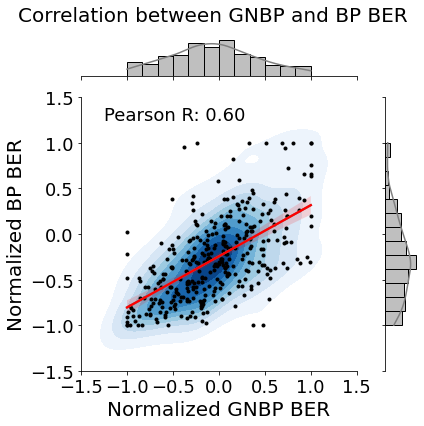

<Figure size 432x288 with 0 Axes>

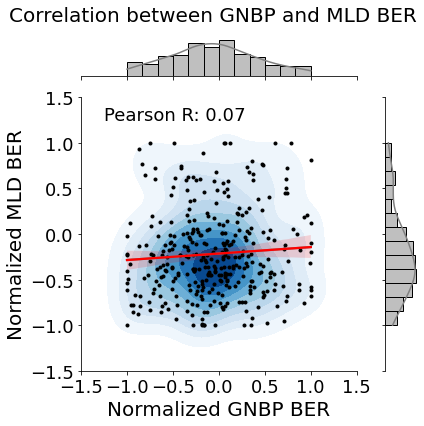

<Figure size 432x288 with 0 Axes>

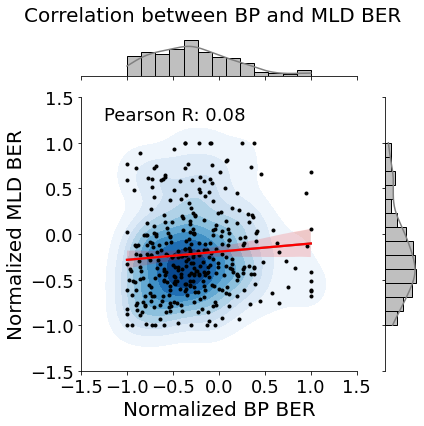

In [3]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt

def pearson_correlation_coefficient(x,y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    std_x = np.sqrt(np.mean(np.power((x-mean_x),2)))
    std_y = np.sqrt(np.mean(np.power((y-mean_y),2))) 
    cov_xy = np.mean((x-mean_x)*(y-mean_y))
    
    corr = cov_xy/(std_x*std_y)
    return corr


  
data = []

with open(f"{plot_config['path']}/results/summary-ber.csv", newline="") as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=",")
    for row in csv_reader:
        data.append(row)
y_label = 'BER'
            
data = np.array(data) 
GNBP_data = np.array(data[1::1,2::3],dtype=np.float32)
ML_data = np.array(data[1::1,3::3],dtype=np.float32)
BP_data = np.array(data[1::1,4::3],dtype=np.float32)

GNBP_min = np.reshape(np.min(GNBP_data,axis=-1),[-1,1])
GNBP_max = np.reshape(np.max(GNBP_data,axis=-1),[-1,1])
normalized_GNBP = (2*GNBP_data - GNBP_min - GNBP_max)/(GNBP_max - GNBP_min)

BP_min = np.reshape(np.min(BP_data,axis=-1),[-1,1])
BP_max = np.reshape(np.max(BP_data,axis=-1),[-1,1])
normalized_BP = (2*BP_data - BP_min - BP_max)/(BP_max - BP_min)

ML_min = np.reshape(np.min(ML_data,axis=-1),[-1,1])
ML_max = np.reshape(np.max(ML_data,axis=-1),[-1,1])
normalized_ML = (2*ML_data - ML_min - ML_max)/(ML_max - ML_min)

corr_GNBP_BP = pearson_correlation_coefficient(normalized_GNBP,normalized_BP)
corr_GNBP_ML = pearson_correlation_coefficient(normalized_GNBP,normalized_ML) 
corr_BP_ML = pearson_correlation_coefficient(normalized_BP,normalized_ML) 


    
title_fontsize = 14+6 
ax_labels_fontsize = 14+6
ticks_fontsize = 12+6
legend_labels_fontsize = 12+6
    
plt.figure(figsize=(10,8))
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
g = sns.jointplot(x=np.reshape(normalized_GNBP,[-1]), y=np.reshape(normalized_BP,[-1]), kind='reg', space=0, color='grey', marker='')#, cmap="Blues", shade=True, color="skyblue", space=0)
g.plot_joint(sns.kdeplot, cmap='Blues', shade=True, levels=10)
g.plot_joint(sns.regplot, marker='', color='red')
g.plot_joint(plt.scatter, marker='.',color='black')
plt.text(-1.25,1.25, f"Pearson R: {corr_GNBP_BP:.2f}", horizontalalignment='left', size='medium', color='black', fontsize=legend_labels_fontsize)
plt.xlim(-1.5,+1.5)
plt.ylim(-1.5,+1.5)
plt.xlabel("Normalized GNBP BER",fontsize=ax_labels_fontsize)
plt.ylabel("Normalized BP BER",fontsize=ax_labels_fontsize)
plt.xticks(fontsize=ticks_fontsize)
plt.yticks(fontsize=ticks_fontsize)
g.fig.suptitle("Correlation between GNBP and BP BER", fontsize=title_fontsize)
g.fig.subplots_adjust(top=0.95) # Reduce plot to make room 
plt.tight_layout()

if plot_config['save']:
    plt.savefig(
        f"{plot_config['path']}/results/GNBP_vs_BP.png", format="png", dpi=500
    )
    
plt.figure()
g = sns.jointplot(x=np.reshape(normalized_GNBP,[-1]), y=np.reshape(normalized_ML,[-1]), kind='reg', space=0, color='grey', marker='')#, cmap="Blues", shade=True, color="skyblue", space=0)
g.plot_joint(sns.kdeplot, cmap='Blues', shade=True, levels=10)
g.plot_joint(sns.regplot, marker='', color='red')
g.plot_joint(plt.scatter, marker='.',color='black')
plt.text(-1.25,1.25, f"Pearson R: {corr_GNBP_ML:.2f}", horizontalalignment='left', size='medium', color='black', fontsize=legend_labels_fontsize)
plt.xlim(-1.5,+1.5)
plt.ylim(-1.5,+1.5)
plt.xlabel("Normalized GNBP BER",fontsize=ax_labels_fontsize)
plt.ylabel("Normalized MLD BER",fontsize=ax_labels_fontsize)
plt.xticks(fontsize=ticks_fontsize)
plt.yticks(fontsize=ticks_fontsize)
g.fig.suptitle("Correlation between GNBP and MLD BER", fontsize=title_fontsize)
g.fig.subplots_adjust(top=0.95) # Reduce plot to make room 
plt.tight_layout()

if plot_config['save']:
    plt.savefig(
        f"{plot_config['path']}/results/GNBP_vs_ML.png", format="png", dpi=500
    )
    
plt.figure()
g = sns.jointplot(x=np.reshape(normalized_BP,[-1]), y=np.reshape(normalized_ML,[-1]), kind='reg', space=0, color='grey', marker='')#, cmap="Blues", shade=True, color="skyblue", space=0)
g.plot_joint(sns.kdeplot, cmap='Blues', shade=True, levels=10)
g.plot_joint(sns.regplot, marker='', color='red')
g.plot_joint(plt.scatter, marker='.',color='black')
plt.text(-1.25,1.25, f"Pearson R: {corr_BP_ML:.2f}", horizontalalignment='left', size='medium', color='black', fontsize=legend_labels_fontsize)
plt.xlim(-1.5,+1.5)
plt.ylim(-1.5,+1.5)
plt.xlabel("Normalized BP BER",fontsize=ax_labels_fontsize)
plt.ylabel("Normalized MLD BER",fontsize=ax_labels_fontsize)
plt.xticks(fontsize=ticks_fontsize)
plt.yticks(fontsize=ticks_fontsize)
g.fig.suptitle("Correlation between BP and MLD BER", fontsize=title_fontsize)
g.fig.subplots_adjust(top=0.95) # Reduce plot to make room 
plt.tight_layout()

if plot_config['save']:
    plt.savefig(
        f"{plot_config['path']}/results/BP_vs_ML.png", format="png", dpi=500
    )



### Plot Code Polynomials


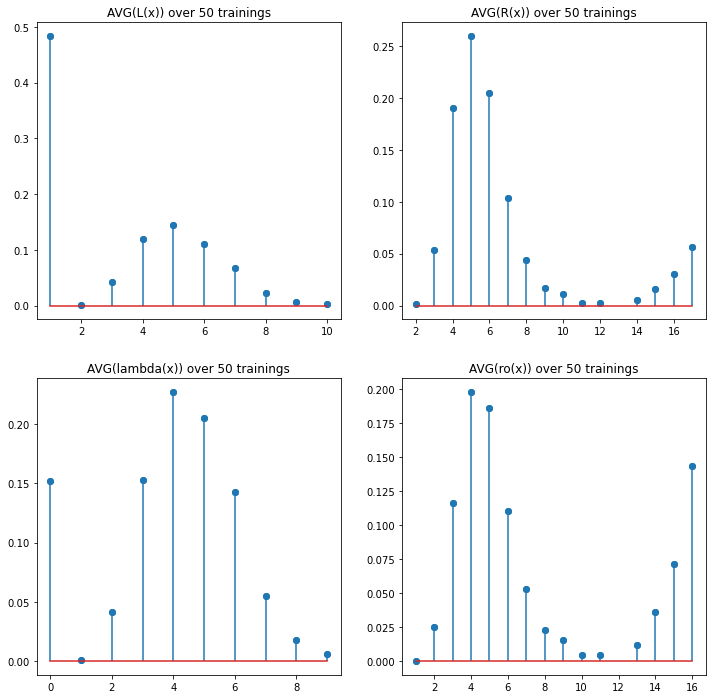

In [8]:
import numpy as np
import csv

class Polynomial():
    def __init__(self, polynomial_dict):
        self.polynomial_dict = polynomial_dict
        self.coefficients = []
        self.degrees = []
        for degree in self.polynomial_dict.keys():
            self.coefficients.append(self.polynomial_dict[degree])
            self.degrees.append(degree)
        
    def sort_polynomial(self,order="increasing"):
        if order not in ["increasing","decreasing"]:
            order = "increasing"
            
        sorted_idx = np.argsort(self.degrees)
        
        if order == "increasing":
            self.degrees = [self.degrees[idx] for idx in sorted_idx]
            self.coefficients = [self.coefficients[idx] for idx in sorted_idx]
        if order == "decreasing":
            self.degrees = [self.degrees[-idx] for idx in sorted_idx]
            self.coefficients = [self.coefficients[-idx] for idx in sorted_idx]
    
    def __add__(self,other):
        new_polynomial_dict = {}
        for degree in self.polynomial_dict.keys():
            new_polynomial_dict[degree] = self.polynomial_dict[degree]
            if degree in other.polynomial_dict.keys():
                new_polynomial_dict[degree] += other.polynomial_dict[degree]
                
        for degree in other.polynomial_dict.keys():
            if degree not in new_polynomial_dict.keys():
                new_polynomial_dict[degree] = other.polynomial_dict[degree]
        new_polynomial = Polynomial(new_polynomial_dict)   
        new_polynomial.sort_polynomial()
        return new_polynomial
    
    def scalar_multiplication(self,a):
        new_coefficients = np.array(self.coefficients)*a
        new_polynomial_dict = {}
        for i in range(len(self.degrees)):
            new_polynomial_dict[self.degrees[i]] = new_coefficients[i]
        return Polynomial(new_polynomial_dict)
    
    def scalar_division(self,a):
        return self.scalar_multiplication(1/a)
        """
        new_coefficients = np.array(self.coefficients)/a
        new_polynomial_dict = {}
        for i in range(len(self.degrees)):
            new_polynomial_dict[self.degrees[i]] = new_coefficients[i]
        return Polynomial(new_polynomial_dict)
        """
    def eval_polynomial(self,x):
        x = np.broadcast_to(x,[len(self.degrees)])
        x = np.power(x,self.degrees)
        x = x*self.coefficients
        x = np.sum(x)
        return x
    
    def polynomial_derivativ(self, order=1):
        new_coefficients = self.coefficients
        new_degrees = self.degrees
        for i in range(order):
            new_coefficients = np.array(new_coefficients)*np.array(new_degrees)
            new_degrees = np.array(new_degrees) - 1
        new_polynomial_dict = {}
        for i in range(len(new_degrees)):
            if new_degrees[i] >= 0:
                new_polynomial_dict[new_degrees[i]] = new_coefficients[i]
        return Polynomial(new_polynomial_dict)
        
    def __str__(self) -> str:
        self.sort_polynomial("increasing")
        if self.degrees[0] == 0:
            str_out = f"{self.coefficients[0]:.2f}"
        else:
            str_out = f"{self.coefficients[0]:.2f}x^{self.degrees[0]}"
        for i in range(1,len(self.coefficients)):
            str_out += f" + {self.coefficients[i]:.2f}x^{self.degrees[i]}"
        return str_out

class CodeAnalysis():
    def __init__(self, H_matrix):
        self.H = H_matrix
        self.compute_node_degrees()
        self.compute_degree_distributions_from_node_perspective()
        self.compute_normalized_degree_distributions_from_node_perspective()
        self.compute_degree_distributions_from_edge_perspective()
        self.compute_matrix()
    
    def compute_node_degrees(self):
        self.variable_node_degrees = np.sum(self.H, axis=0)
        self.check_node_degrees = np.sum(self.H, axis=-1)
        
    def compute_degree_distributions_from_node_perspective(self):
        variable_degree_distribution_from_node_dict = {}
        for degree in self.variable_node_degrees:
            if degree not in variable_degree_distribution_from_node_dict:
                variable_degree_distribution_from_node_dict[degree] = 1
            else:
                variable_degree_distribution_from_node_dict[degree] += 1
        self.variable_degree_distribution_from_node = Polynomial(variable_degree_distribution_from_node_dict)
        
        check_degree_distribution_from_node_dict = {}
        for degree in self.check_node_degrees:
            if degree not in check_degree_distribution_from_node_dict:
                check_degree_distribution_from_node_dict[degree] = 1
            else:
                check_degree_distribution_from_node_dict[degree] += 1
        self.check_degree_distribution_from_node = Polynomial(check_degree_distribution_from_node_dict)
        
    def compute_normalized_degree_distributions_from_node_perspective(self):
        self.normalized_variable_degree_distribution_from_node = self.variable_degree_distribution_from_node.scalar_division(self.variable_degree_distribution_from_node.eval_polynomial(x=1))
        self.normalized_check_degree_distribution_from_node = self.check_degree_distribution_from_node.scalar_division(self.check_degree_distribution_from_node.eval_polynomial(x=1))
    
    def compute_degree_distributions_from_edge_perspective(self):
        variable_degree_distribution_from_node_1st_order_derivative = self.variable_degree_distribution_from_node.polynomial_derivativ(order=1)
        self.variable_degree_distribution_from_edge = variable_degree_distribution_from_node_1st_order_derivative.scalar_division(variable_degree_distribution_from_node_1st_order_derivative.eval_polynomial(x=1))  
        check_degree_distribution_from_node_1st_order_derivative = self.check_degree_distribution_from_node.polynomial_derivativ(order=1)
        self.check_degree_distribution_from_edge = check_degree_distribution_from_node_1st_order_derivative.scalar_division(check_degree_distribution_from_node_1st_order_derivative.eval_polynomial(x=1))
      
    def compute_matrix(self):
        self.density = np.mean(self.H)  
        
    def __str__(self):
        str_out = "Code degree distributions from node perspective:\n"\
            +f"Lambda(x) = {self.variable_degree_distribution_from_node}\n"\
            +f"L(x) = {self.normalized_variable_degree_distribution_from_node}\n"\
            +f"P(x) = {self.check_degree_distribution_from_node}\n"\
            +f"R(x) = {self.normalized_check_degree_distribution_from_node}\n"\
            +"Code degree distributions from edge perspective:\n"\
            +f"lambda(x) = {self.variable_degree_distribution_from_edge}\n"\
            +f"ro(x) = {self.check_degree_distribution_from_edge}\n"\
            +"Code density:\n"\
            +f"delta = {self.density}"    
        return str_out


normalized_variable_degree_distribution_from_node = None
normalized_check_degree_distribution_from_node = None
variable_degree_distribution_from_edge = None
check_degree_distribution_from_edge = None
   
for i in range(50):    
    path = f"study-ae-31-16-rep/models/AE_GNBP_{i}/matrices/H.csv"
    H = []
    with open(path, newline="") as csvfile:
        csv_reader = csv.reader(csvfile, delimiter=" ")
        for row in csv_reader:
            H.append([int(i) for i in row])
    H = np.array(H)
  
    
    C = CodeAnalysis(H)

    if normalized_variable_degree_distribution_from_node is not None and normalized_check_degree_distribution_from_node is not None and variable_degree_distribution_from_edge is not None and check_degree_distribution_from_edge is not None:
        normalized_variable_degree_distribution_from_node = (C.normalized_variable_degree_distribution_from_node + normalized_variable_degree_distribution_from_node.scalar_multiplication(i)).scalar_division(i+1)
        normalized_check_degree_distribution_from_node = (C.normalized_check_degree_distribution_from_node + normalized_check_degree_distribution_from_node.scalar_multiplication(i)).scalar_division(i+1)
        variable_degree_distribution_from_edge = (C.variable_degree_distribution_from_edge + variable_degree_distribution_from_edge.scalar_multiplication(i)).scalar_division(i+1)
        check_degree_distribution_from_edge = (C.check_degree_distribution_from_edge + check_degree_distribution_from_edge.scalar_multiplication(i)).scalar_division(i+1)
    else:
        normalized_variable_degree_distribution_from_node = C.normalized_variable_degree_distribution_from_node 
        normalized_check_degree_distribution_from_node = C.normalized_check_degree_distribution_from_node
        variable_degree_distribution_from_edge = C.variable_degree_distribution_from_edge 
        check_degree_distribution_from_edge = C.check_degree_distribution_from_edge



fig = plt.figure(figsize=(12,12))

normalized_variable_degree_distribution_from_node.sort_polynomial()
x = normalized_variable_degree_distribution_from_node.degrees
y = normalized_variable_degree_distribution_from_node.coefficients

plt.subplot(2,2,1)
plt.title("AVG(L(x)) over 50 trainings")
plt.scatter(x,y)
plt.stem(x,y)

normalized_check_degree_distribution_from_node.sort_polynomial()
x = normalized_check_degree_distribution_from_node.degrees
y = normalized_check_degree_distribution_from_node.coefficients

plt.subplot(2,2,2)
plt.title("AVG(R(x)) over 50 trainings")
plt.scatter(x,y)
plt.stem(x,y)

variable_degree_distribution_from_edge.sort_polynomial()
x = variable_degree_distribution_from_edge.degrees
y = variable_degree_distribution_from_edge.coefficients

plt.subplot(2,2,3)
plt.title("AVG(lambda(x)) over 50 trainings")
plt.scatter(x,y)
plt.stem(x,y)

check_degree_distribution_from_edge.sort_polynomial()
x = check_degree_distribution_from_edge.degrees
y = check_degree_distribution_from_edge.coefficients

plt.subplot(2,2,4)
plt.title("AVG(ro(x)) over 50 trainings")
plt.scatter(x,y)
plt.stem(x,y)
plt.show()



Copyright (c) 2022 Orange

Author: Guillaume Larue <guillaume.larue@orange.com>

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), 
to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, 
and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice (including the next paragraph) shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS 
FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER 
IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE

